## ***ADABOOST ALGORITHM***

## Introduction

AdaBoost algorithm, is short form for Adaptive Boosting, and it is a Boosting technique used as an Ensemble Method. This is called Adaptive Boosting because the weights are re-assigned to each instance, and higher weights are given to incorrectly classified instances. It is used to decrease bias and variance for supervised learning. It works on the concept of learners increasing sequentially as each subsequent learner is grown from previous learners except the first layer. Weak learners are transformed into strong ones.

### Properties and Applications of the Algorithm

1. It adjusts the errors of the weak hypotheses by weak learner in an adaptive way.
2. The prior error need not be known ahead of time which is not the case of the normal boosting algorithm.
3. The update rule decreases the probability given to examples on which the hypothesis makes good predictions and increases the probability of the examples on which the prediction is not good.

AdaBoost can be used to solve a variety of daily life problems, such as predicting customer churn and classifying the types of topics customers are having conversation about. The algorithm is heavily utilised for solving classification problems, because of its relative ease of implementation in languages such as R and Python.

### Advantages of AdaBoost Algorithm


1. One of the many advantages of the AdaBoost Algorithm is it is fast, simple and easy to program.
2. Boosting has been shown to be robust to overfitting.
3. It has been extended to learning problems beyond binary classification (i.e.) it can be used with text or numeric data.

### Drawbacks of AdaBoost Algorithm


1. AdaBoost can be sensitive to noisy data and outliers.
2. Weak classifiers being too weak can lead to low margins and overfitting.

### How does it work?

Boosting works by making ‘n’ number of decision trees during the training process. As the first decision tree is made, the incorrectly classified record in the first model is given priority. Only these records are sent as input to the second model. The process continues until we specify a number of base learners we want to create.

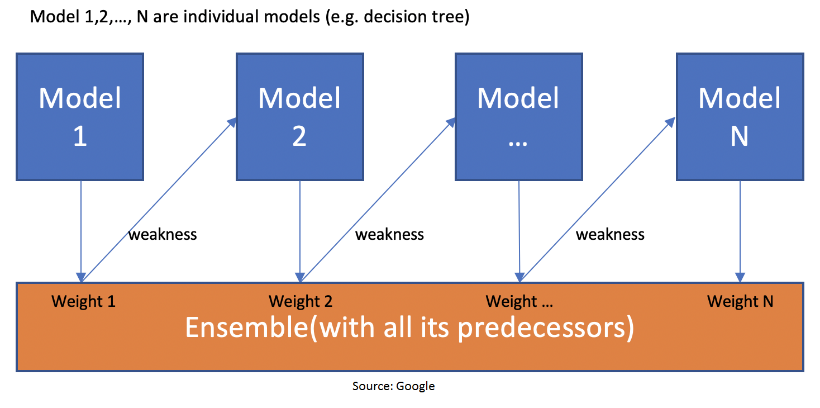

This figure shows how the first model is made and errors from the first model are noted by the algorithm. The record which is incorrectly classified is used as input for the next model. This process is repeated until the specified condition is met. As you can see in the figure, there are ‘n’ number of models made by taking the errors from the previous model. This is how boosting works. The models 1,2, 3,…, N are individual models that can be known as decision trees. All types of boosting models work on the same principle.

Now we can look at the working of AdaBoost Algorithm. When the random forest is used, the algorithm makes an ‘n’ number of trees. It makes proper trees that consist of a start node with several leaf nodes. Some trees might be bigger than others, but there is no fixed depth in a random forest. With AdaBoost, however, the algorithm only makes a node with two leaves, known as Stump.


### Implementation of AdaBoost Algorithm

Step 1 – First, we start by creating the first base learner. So, we take the first feature, and hence build the first stump, f1. AdaBoost will create the same number of stumps as the number of features. For eg, it will create 3 stumps as there are only 3 features in this dataset. From these stumps, it will create three decision trees. Then from the 3 models, the algorithm selects only one of them. Gini and Entropy are considered while selecting the first base learner. The stump with the minimum value will be the first base learner. So, let’s take stump 1, i.e., feature 1 as our first base learner.

Step 2 – Calculating the Total Error (TE) The total error is the sum of all the errors in the classified record for sample weights. Here, there is only 1 error, so Total Error (TE) = 1/5.

Step 3 – Calculation of Performance of the Stump Formula for calculating Performance of the Stump is: –
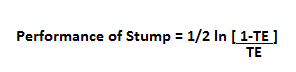

Performance of Stump Formula where, ln is natural log and TE is Total Error.

It is necessary to calculate the TE and performance of a stump because we must update the sample weight before proceeding to the next model or stage because if the same weight is applied, the output received will be from the first model. In boosting, only the wrong records classified records would get more preference than the correctly classified records but in AdaBoost, both records were allowed to pass and the wrong records are repeated more than the correct ones. We must increase the weight for the wrongly classified records and decrease the weight for the correctly classified records. In the next step, we will be updating the weights based on the performance of the stump.

Step 4 – Updating Weights For incorrectly classified records, the formula for updating weights is:

New Sample Weight = Sample Weight * e^(Performance)

For correctly classified records, we use the same formula with the performance value being negative. This leads the weight for correctly classified records to be reduced as compared to the incorrectly classified ones. The formula is:

New Sample Weight = Sample Weight * e^- (Performance)
Normalized Weight Step 5 – Creating a New Dataset Now, it’s time to create a new dataset from our previous one. In the new dataset, the frequency of incorrectly classified records will be more than the correct ones. The new dataset has to be created using and considering the normalized weights. It will probably select the wrong records for training purposes. That will be the second decision tree/stump. To make a new dataset based on normalized weight, the algorithm will divide it into buckets.

Based on this new dataset, the algorithm will create a new decision tree/stump and it will repeat the same process from step 1 till it sequentially passes through all stumps and finds that there is less error as compared to normalized weight that we had in the initial stage.

### CODE IMPLEMENTATION

We use the Iris dataset where our objective is to determine the Target variable "Species" from the given features using AdaBoost Algorithm.

The first step is to load the required libraries.

In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
iris = pd.read_csv('/content/Iris.csv')


In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Declare feature vector and target variable


In [4]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
y = iris['Species']

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

Split dataset into training set and test set

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Build the AdaBoost model

The most important parameters of AdaBoost are base_estimator, n_estimators and learning_rate.

base_estimator is the learning algorithm to use to train the weak models. This will almost always not needed to be changed because by far the most common learner to use with AdaBoost is a decision tree – this parameter’s default argument.

n_estimators is the number of models to iteratively train.

learning_rate is the contribution of each model to the weights and defaults to 1. Reducing the learning rate will mean the weights will be increased or decreased to a small degree, forcing the model train slower (but sometimes resulting in better performance scores).

loss is exclusive to AdaBoostRegressor and sets the loss function to use when updating weights. This defaults to a linear loss function however can be changed to square or exponential.

In [8]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

Evaluate Model 


In [10]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier Model Accuracy: 0.9210526315789473


So, we get an accuracy of 92.10% from the AdaBoost classifer which can be considered a good accuracy.

## Conclusion

AdaBoost helps in choosing the training set for each new classifier that is trained based on the results of the previous classifier. Also, while combining the results; it determines how much weight should be given to each classifier’s proposed answer. It combines the weak learners to create a strong one to correct classification errors which is also the first successful boosting algorithm for binary classification problems.